In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# A colony of mice with a genetic mutation have a mean life expectancy of 80 days. You give 30 mice an experimental drug and record their lifetimes (see below).

In [72]:
lifetimes = st.norm.rvs(loc=85, scale=10, size=30, random_state=1)

### Plot the lifetimes of the 30 experimental subjects. Indicate the mean and 95% confidence interval of the mean.

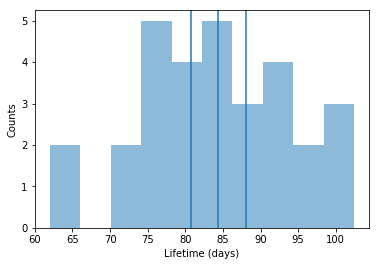

In [76]:
plt.hist(lifetimes, alpha=0.5)
plt.axvline(lifetimes.mean())
plt.axvline(lifetimes.mean() + 1.96 * lifetimes.std() / np.sqrt(30))
plt.axvline(lifetimes.mean() - 1.96 * lifetimes.std() / np.sqrt(30))
plt.xlabel('Lifetime (days)')
plt.ylabel('Counts');

### What is our null hypothesis?
Drug has no effect on lifetime, i.e. subject lifetimes come from a population with mean equal to 80 days.

### What is our alternative hypothesis?
Drug has an effect on lifetime, i.e. subject lifetimes come from a population with mean NOT equal to 80 days.

### What statistical test should we use?
One sample t-test vs. known mean.

### Apply test to obtain a p-value.

In [74]:
t, p = st.ttest_1samp(lifetimes, 80)
print("p-value for H0 (drug has no effect) is", p)

p-value for H0 (drug has no effect) is 0.02588326116567262


### Do we reject the null hypothesis?
Yes, reject $H_0$ as $p < 0.05$.

### Does the drug have an effect on lifetime?
Yes

### What is the size of the drug's effect?

In [75]:
(lifetimes.mean() - 80) / lifetimes.std()

0.4360865581406126

### Does the drug have a meaningful effect on lifetime?
The effect is very small compared to the variance, so one might conclude that this effect is not big enough to matter much.

# For the same colony, do life expectancies differ between females and males?

In [96]:
female_lifetimes = st.norm.rvs(loc=82, scale=10, size=30, random_state=1)
male_lifetimes = st.norm.rvs(loc=79, scale=10, size=30, random_state=80)

### Plot the lifetimes.

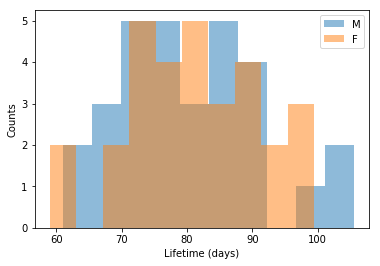

In [97]:
plt.hist(male_lifetimes, alpha=0.5, label='M')
plt.hist(female_lifetimes, alpha=0.5, label='F')
plt.xlabel('Lifetime (days)')
plt.ylabel('Counts')
plt.legend();

### What is our null hypothesis?
Males and females have the same life expectancy.

### What is our alternative hypothesis?
Males and females have different life expectancies.

### What statistical test should we use?
Two independent samples t-test.

### Apply test to obtain a p-value.

In [98]:
t, p = st.ttest_ind(female_lifetimes, male_lifetimes)
print("p-value for H0 (life expectancy is the same for males and females) is", p)

p-value for H0 (life expectancy is the same for males and females) is 0.6357118503877869


### Do we reject the null hypothesis?
No, we do NOT reject $H_0$ as $p > 0.05$.

### Does male and female life expectancy differ?
Not that we can tell.

# For the same colony, does the drug have an effect on a memory recall task? Compare task scores for mice before and after recieving the drug.

In [101]:
before = st.norm.rvs(loc=115, scale=20, size=30, random_state=7)
after = before + st.norm.rvs(loc=-10, scale=10, size=30, random_state=3)

### Plot the before and after score distributions.

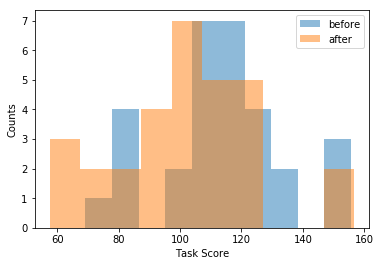

In [102]:
plt.hist(before, alpha=0.5, label='before')
plt.hist(after, alpha=0.5, label='after')
plt.xlabel('Task Score')
plt.ylabel('Counts')
plt.legend();

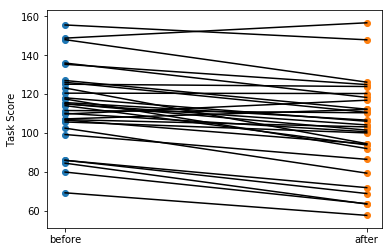

In [107]:
plt.scatter(np.zeros(len(before)), before, label='before')
plt.scatter(np.ones(len(after)), after, label='after')
for i in range(len(before)):
    plt.plot([0, 1], [before[i], after[i]], 'k')
plt.xticks([0, 1], ['before', 'after'])
plt.ylabel('Task Score');

### What is our null hypothesis?
Drug has no effect on task score.

### What is our alternative hypothesis?
Drug has an effect on task score.

### What statistical test should we use?
Two related samples t-test.

### Apply test to obtain a p-value.

In [108]:
t, p = st.ttest_rel(before, after)
print("p-value for H0 (drug noes NOT affect task score) is", p)

p-value for H0 (drug noes NOT affect task score) is 2.637607974903502e-07


### Do we reject the null hypothesis?
Yes, we reject $H_0$ as $p < 0.05$.

### Does the drug affect ability in the memory recall task?
Yes.

### What is the size of the drug's effect?

In [110]:
after.mean() - before.mean(), after.std(), before.std()

(-11.249020187686227, 23.007614162862083, 19.873167279660723)

In [111]:
(after.mean() - before.mean()) / np.sqrt((after.var() + before.var()) / 2)

-0.5232688010905608

### Is the effect worth considering?
Highly probable that task score will drop by nearly 10% after drug treatment, so probably worth keeping in mind.

# You record action potentials from a neuron under a set of basal conditions, and then following application of an experimental compound. You measure a basal firing rate of 5 per second before adding the compound, and after applying the compound you record a mean spike rate 6 per second. Did the compound have an effect on firing rate?
Use the bootstrap approach to generate 10,000 bootstrap estimates of the basal firing rate, with each estimate coming from a sample of 100 interspike intervals. Then compare post-compound spike rate with bootstrapped distribution of basal spike rates.

# Same as above, but use bootstrap to estimate spike rate distributions both before and after compound for samples of 30 interspike intervals in each case. What is the power for this test?

# Same as above, but for a samples of 5,000 interspike intervals in each case. What is the power for this test?